In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
mnist = pd.read_csv("../datasets/mnist_train_small.csv", header=None).to_numpy()

In [21]:
X, y = mnist[:, 1:], mnist[:, 0]

In [4]:
from sklearn.decomposition.pca import PCA

In [56]:
import numpy as np
import os
import tempfile

import keras
from keras.layers import Dense, Input
from keras.models import Model
from keras.losses import mean_squared_error
from keras.optimizers import rmsprop
from keras import backend as K
from keras import layers
from keras.datasets import mnist

In [13]:
train, test = mnist.load_data()

In [17]:
test[0].shape

(10000, 28, 28)

In [48]:
pca_model = PCA(50)

In [49]:
X_mod = pca_model.fit_transform(X)

In [50]:
X_mod.shape

(20000, 50)

In [51]:
pca_model.components_.shape

(50, 784)

In [52]:
back = np.dot(X_mod, pca_model.components_)

In [53]:
back.shape

(20000, 784)

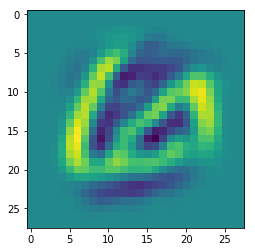

In [54]:
plt.imshow(back[0].reshape(28, 28))

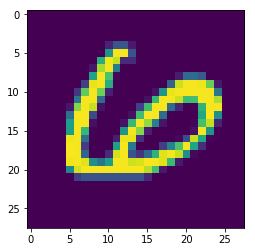

In [55]:
plt.imshow(X[0].reshape(28, 28))

In [59]:
in_layer = Input(shape=(784,))
d_1 = Dense(250, activation="tanh")(in_layer)
d_2 = Dense(100, activation="tanh")(d_1)
d_3 = Dense(50, activation="tanh")(d_2)
d_4 = Dense(100, activation="tanh")(d_3)
d_5 = Dense(250, activation="tanh")(d_4)
d_6 = Dense(784, activation="relu")(d_5)

Instructions for updating:
Colocations handled automatically by placer.


In [60]:
model = Model(inputs=[in_layer], outputs=[d_6])

In [70]:
model.compile(optimizer="rmsprop", loss="mean_squared_error")

In [77]:
model.fit(X, X, batch_size=100, epochs=10)

Epoch 1/10
20000/20000 [==============================] - 2s 113us/step - loss: 3519.9172
Epoch 2/10
20000/20000 [==============================] - 2s 100us/step - loss: 3367.4492
Epoch 3/10
20000/20000 [==============================] - 2s 94us/step - loss: 3234.7605
Epoch 4/10
20000/20000 [==============================] - 2s 93us/step - loss: 3129.5925
Epoch 5/10
20000/20000 [==============================] - 2s 101us/step - loss: 3044.4023
Epoch 6/10
20000/20000 [==============================] - 2s 116us/step - loss: 2963.5246
Epoch 7/10
20000/20000 [==============================] - 2s 97us/step - loss: 2886.2012
Epoch 8/10
20000/20000 [==============================] - 2s 98us/step - loss: 2813.1833
Epoch 9/10
20000/20000 [==============================] - 2s 99us/step - loss: 2744.0677
Epoch 10/10
20000/20000 [==============================] - 2s 115us/step - loss: 2687.3059


In [78]:
out = model.predict(X[:5])

In [79]:
out.shape

(5, 784)

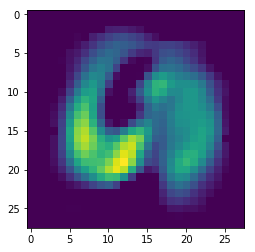

In [82]:
plt.imshow(out[0].reshape(28, 28))

In [83]:
y[0]

6

In [84]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [85]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [91]:
autoencoder.fit(X.reshape(20000, 28, 28, 1) / 255 , X.reshape(20000, 28, 28, 1) / 255)

Epoch 1/1
20000/20000 [==============================] - 16s 804us/step - loss: 0.2039


In [98]:
out = autoencoder.predict(X[:2].reshape(-1, 28, 28, 1))

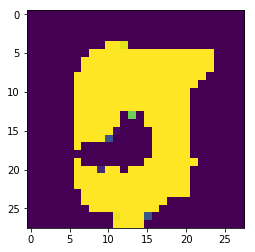

In [100]:
plt.imshow(out[1].reshape(28, 28))

In [101]:
autoencoder.layers

In [104]:
encoder = Model(autoencoder.input, autoencoder.layers[7].output)

In [105]:
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [107]:
decoder = Model(autoencoder.layers[7], autoencoder.output)

ValueError: Input tensors to a Model must come from `keras.layers.Input`. Received: <keras.layers.convolutional.Conv2D object at 0x13d911c18> (missing previous layer metadata).